# KNN

O KNN é um dos algoritmos mais simples para Machine Learning, sendo um algorítmo do tipo "LAZY", OU SEJA, NENHUMA COMPUTAÇÃO É REALIZADA NO DAASET ATÉ QUE UM NOVO PONTO SEJA ALVO DE TESTE

### CLASSIFICAÇÃO KNN em Python -  Definindo um problema para Classificação Multiclasse

Faremos previsões de dígitos escritos à mão no dataset mnist. Esse é um exemplo de classificação multiclasse, pois nosso modelo terá que prever uma entre 10 saídas possíveis para cada registro (digitos de 0 a 10)

In [1]:
# Imports
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carrega o dataset
digitos = datasets.load_digits()

In [5]:
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
# Visualizando algumas imagens e labels

images_e_labels = list(zip(digitos.images, digitos.target))

In [16]:
images_e_labels

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
  0),
 (array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
         [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
         [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]),
  1),
 (array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
         [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
         [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
         [ 0., 

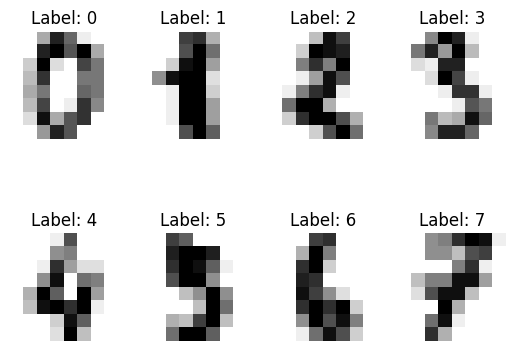

In [12]:
# Visualizando com matplotlib

for index, (image, label) in enumerate(images_e_labels[:8]):
 plt.subplot(2, 4, index + 1)
 plt.axis('off')
 plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
 plt.title('Label: %i' % label)

In [17]:
# Gerando X e Y
X = digitos.data
y = digitos.target

In [20]:
print(X.shape, y.shape)

(1797, 64) (1797,)


### Classificação KNN em Python - PRÉ PROCESSAMENTO

In [18]:
# Divisão em dados de treino e teste
X_treino, testeData, Y_treino, testeLabels = train_test_split(X,y,test_size= 0.30, random_state=101)

In [19]:
# Divisão dos dados de treino em dados de treino e dados de validação 
treinoData, validData, treinoLabels, validLabels = train_test_split(X_treino,
                                                                    Y_treino,
                                                                    test_size=0.1,
                                                                    random_state= 84)

In [21]:
# Validação é importante para já avaliar o modelo durante a fase de treinmaento para ganhar tempo - aumentar a precisão 

In [23]:
# Imprimindo o número de exemplos (observações) em cada dataset
print(f"Exemplo de Treino: {len(treinoLabels)}")
print(f"Exemplo de Validação: {len(validLabels)}")
print(f"Exemplo de teste: {len(testeLabels)}")

Exemplo de Treino: 1131
Exemplo de Validação: 126
Exemplo de teste: 540


In [24]:
# Aplicando a normalização - EXIGÊNCIA DO KNN por trabalhar com distância matemática
# Normalizando pela média

# Calculo da média do dataset de treino
X_norm = np.mean(X, axis = 0)

# Normalização dos dados de treino e de teste
X_treino_norm = treinoData - X_norm
X_valid_norm = validData - X_norm
X_teste_norm = testeData - X_norm

In [28]:
# shpae dos datasets
print(X_treino_norm.shape, X_valid_norm.shape, X_teste_norm.shape)

(1131, 64) (126, 64) (540, 64)


### Classificação KNN em Python - Testando o Mlehor Valor de K

- VALORES IMPARES APRESENTAM MELHORES RESULTADOS COM KNN

In [34]:
# Range de valores de K que iremos testar
kVals = range(1, 40, 2) # indo do 1 ao 30 de 2 em 2

In [35]:
# Lista vazia para receber as acurácias
acuracias = []

In [40]:
# Loop em todos os valores de k para testar cada um deles
for k in kVals:

 # Treinando o modelo KNN com cada valor de k
 modeloKNN = KNeighborsClassifier(n_neighbors=k)
 modeloKNN.fit(treinoData, treinoLabels)

 # Avalaiando o modelo e atualizando a lista de acurácias
 score = modeloKNN.score(validData, validLabels)
 print(f"Com valor de K = {k}, a acurácia é de {round(score * 100, 2)}%")
 acuracias.append(score)

Com valor de K = 1, a acurácia é de 99.21%
Com valor de K = 3, a acurácia é de 100.0%
Com valor de K = 5, a acurácia é de 100.0%
Com valor de K = 7, a acurácia é de 99.21%
Com valor de K = 9, a acurácia é de 98.41%
Com valor de K = 11, a acurácia é de 98.41%
Com valor de K = 13, a acurácia é de 97.62%
Com valor de K = 15, a acurácia é de 97.62%
Com valor de K = 17, a acurácia é de 97.62%
Com valor de K = 19, a acurácia é de 97.62%
Com valor de K = 21, a acurácia é de 97.62%
Com valor de K = 23, a acurácia é de 97.62%
Com valor de K = 25, a acurácia é de 96.83%
Com valor de K = 27, a acurácia é de 96.83%
Com valor de K = 29, a acurácia é de 96.83%
Com valor de K = 31, a acurácia é de 96.83%
Com valor de K = 33, a acurácia é de 96.03%
Com valor de K = 35, a acurácia é de 96.03%
Com valor de K = 37, a acurácia é de 96.03%
Com valor de K = 39, a acurácia é de 96.03%


In [42]:
# Obtendo o valor de K que apresentou a maior acurácia
i = np.argmax(acuracias)
print(f"O valor de k = {kVals[i]}, alcancou a acurácia mais alta de {acuracias[i] * 100}%")

O valor de k = 3, alcancou a acurácia mais alta de 100.0%


### Classificação com KNN em Python - Construção e Treinamento do Modelo KNN

In [49]:
# Criando a versão final do modelo com maior valor de k
modeloFinal = KNeighborsClassifier(n_neighbors= kVals[i])

In [50]:
# Treinamento do modelo
modeloFinal.fit(treinoData, treinoLabels)

KNeighborsClassifier(n_neighbors=3)

In [55]:
# O SKLEARN utiliza a distância minkowski para traçar a distância

modeloFinal.metric

'minkowski'

### Classificação com KNN - Previsões com Dados de Teste e Avaliação do Modelo

In [51]:
# Previsões com os dados de teste 
predictions = modeloKNN.predict(testeData)

In [52]:
# pERFORMANCE DO MODELO NOS DADOS DE TESTE
print("Avaliação do modelo nos dados de teste: ")
print(classification_report(testeLabels, predictions))

Avaliação do modelo nos dados de teste: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.88      0.96      0.92        55
           2       0.98      0.96      0.97        49
           3       0.96      0.98      0.97        54
           4       0.97      0.97      0.97        61
           5       0.98      0.95      0.97        59
           6       0.98      0.98      0.98        46
           7       0.93      1.00      0.97        56
           8       0.93      0.86      0.89        59
           9       0.96      0.92      0.94        48

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [53]:
# Confuison Matrix do modelo final
print("Confusion Matrix")
print(confusion_matrix(testeLabels, predictions))

Confusion Matrix
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 53  1  0  0  0  1  0  0  0]
 [ 0  1 47  0  0  0  0  0  1  0]
 [ 0  0  0 53  0  0  0  1  0  0]
 [ 0  0  0  0 59  0  0  0  2  0]
 [ 0  0  0  0  1 56  0  0  0  2]
 [ 0  0  0  0  0  0 45  0  1  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  5  0  2  0  0  0  1 51  0]
 [ 0  1  0  0  0  1  0  2  0 44]]


Eu acredito que esse dígito seja: 5


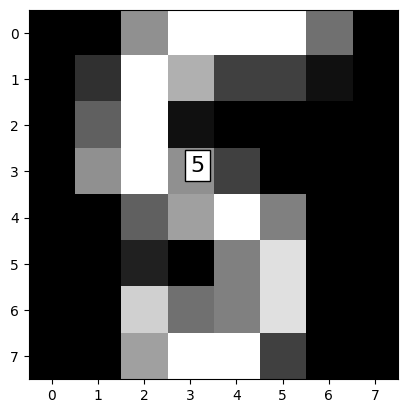

Eu acredito que esse dígito seja: 2


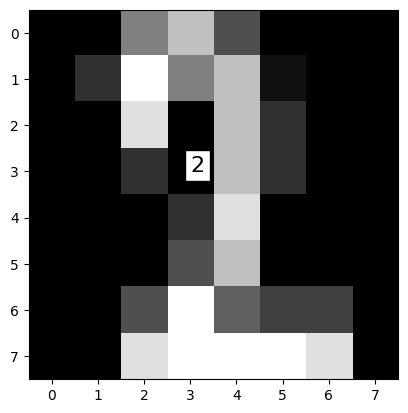

Eu acredito que esse dígito seja: 7


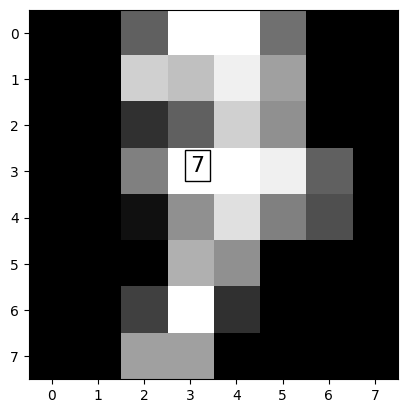

Eu acredito que esse dígito seja: 5


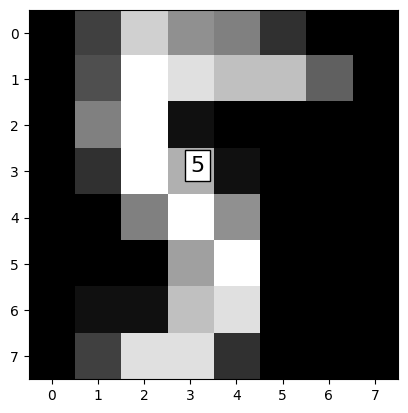

Eu acredito que esse dígito seja: 1


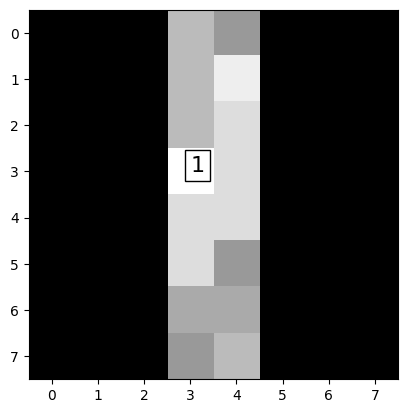

In [57]:
for i in np.random.randint(0, high=len(testeLabels), size=(5,)):
         
    # Obtém uma imagem e faz a previsão
    image = testeData[i]
    prediction = modeloFinal.predict([image])[0]
         
    # Mostra as previsões
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape((8,8))
    plt.imshow(pixels,cmap='gray')
    plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
    print("Eu acredito que esse dígito seja: {}".format(prediction))
    plt.show()

### Classificação com KNN - Previsão com novos dados

In [66]:
# Definindo um novo dígito (dados de entrada)
novoDigito = [0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
              0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
              6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5.,
              0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  0.,  0.,  3., 14.,
              9.,  2., 16.,  2.,  0.,  0.,  0.,  7., 15., 16., 11.,  0.]

In [67]:
# Normalizando o novo digito
novoDigito_norm = novoDigito - X_norm

In [68]:
# Fazendo a previsao com o modelo treinado
novaPrevisao = modeloFinal.predict([novoDigito_norm])

Eu acredito que esse dígito seja: 1


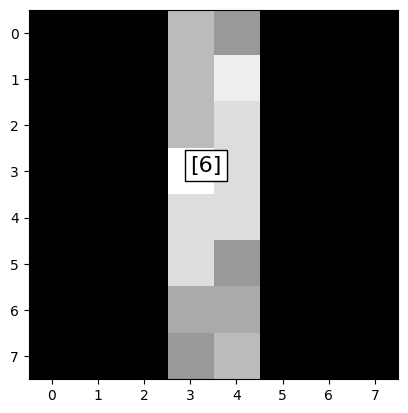

In [69]:
# PREVISÃO 

 # Mostra as previsões
imgdata = np.array(image, dtype='float')
Pixels = imgdata.reshape((8,8))
plt.imshow(pixels,cmap='gray')
plt.annotate(novaPrevisao,(3,3),bbox={'facecolor':'white'},fontsize=16)
print("Eu acredito que esse dígito seja: {}".format(prediction))
plt.show()